## Hypothesis
To predict the incentive level requested to shut down or raise 5 degrees during the summer
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg


In [54]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];



#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$AwaySNY==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

sort(names(data1))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "AwayS"      "AwayW"      "BillS"      "BillW"     
 [11] "CashYN"     "ComfNS"     "ComfNS1"    "ComfNS2"    "ComfNS3"   
 [16] "ComfNW"     "ComfNW1"    "ComfNW2"    "ControlN1"  "ControlN2R"
 [21] "ControlN3"  "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"    
 [26] "ConvB4"     "Educ"       "EmerRForm"  "EnergyC"    "EnergyC1"  
 [31] "EnergyC2"   "EnergyC3"   "EnergyC4"   "Ethnic"     "Frugal1"   
 [36] "Frugal2"    "Frugal3"    "Gender"     "HabitC"     "HabitC1"   
 [41] "HabitC2"    "HabitC3"    "HabitC4"    "HabitC5"    "HabitC6"   
 [46] "HabitC7"    "HabitE1"    "HabitE2"    "HabitE3"    "HabitG"    
 [51] "HomeS"      "HomeW"      "HouseholdS" "INT1"       "INT2"      
 [56] "INT3"       "INT4"       "IncAutoS"   "IncAutoW"   "IncAwayS"  
 [61] "IncAwayW"   "IncDish"    "IncEmer10S" "IncEmer10W" "IncEmer30S"
 [66] "IncEmer30W" "IncHomeS"   "IncHomeW"   "IncWD"      "Income"    
 [71] "Latitude"   "MC"         "MC1"        "MC2"        "MC3"       
 [76] "MC4"        "MC5"        "MCBill"     "OwnRent"    "PBC1"      
 [81] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "Political" 
 [86] "RewardForm" "SN"         "SN1"        "SN2"        "SN3"       
 [91] "SN4"        "Sqft"       "SqftCate"   "State"      "SubNorm"   
 [96] "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg" "Trust1"    
[101] "Trust2"     "Trust3"     "Trust4"     "Winter_avg" "X.9to5"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       4       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 37  39  55 127  83  64  86  66   5 

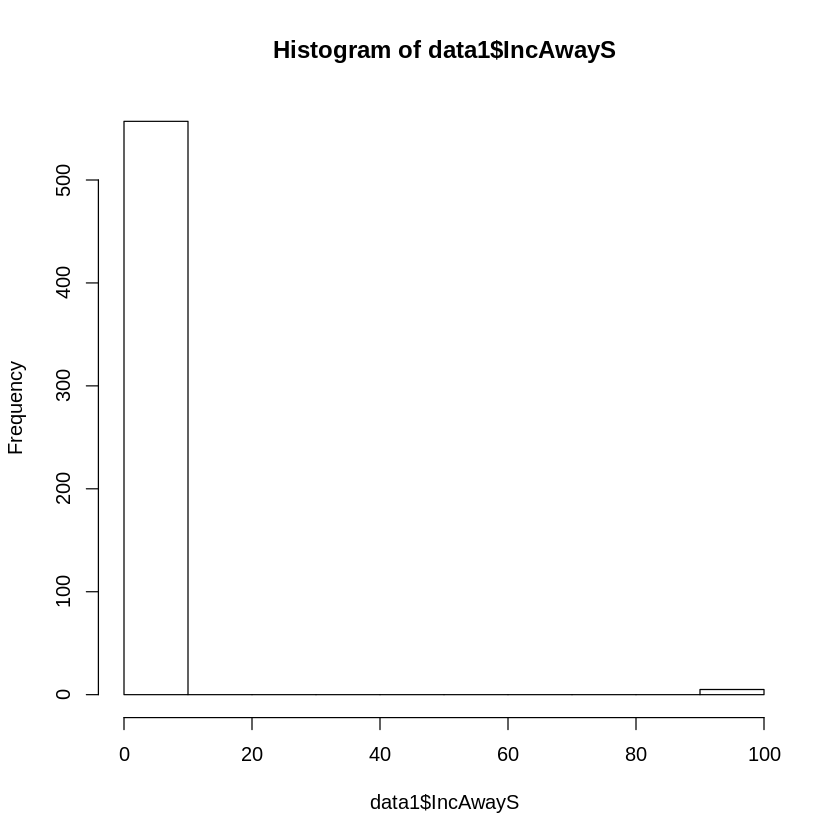

In [55]:
summary(data1$IncAwayS)
table(data1$IncAwayS)
hist(data1$IncAwayS)


40 50 55 60 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 
 2  6  5 19  5  2  3 18  3  1 27  6 70  4 63 11 26 69 32  9 60  6 77  2 12  1 
84 85 88 89 90 93 95 
 3 13  1  1  2  2  1 

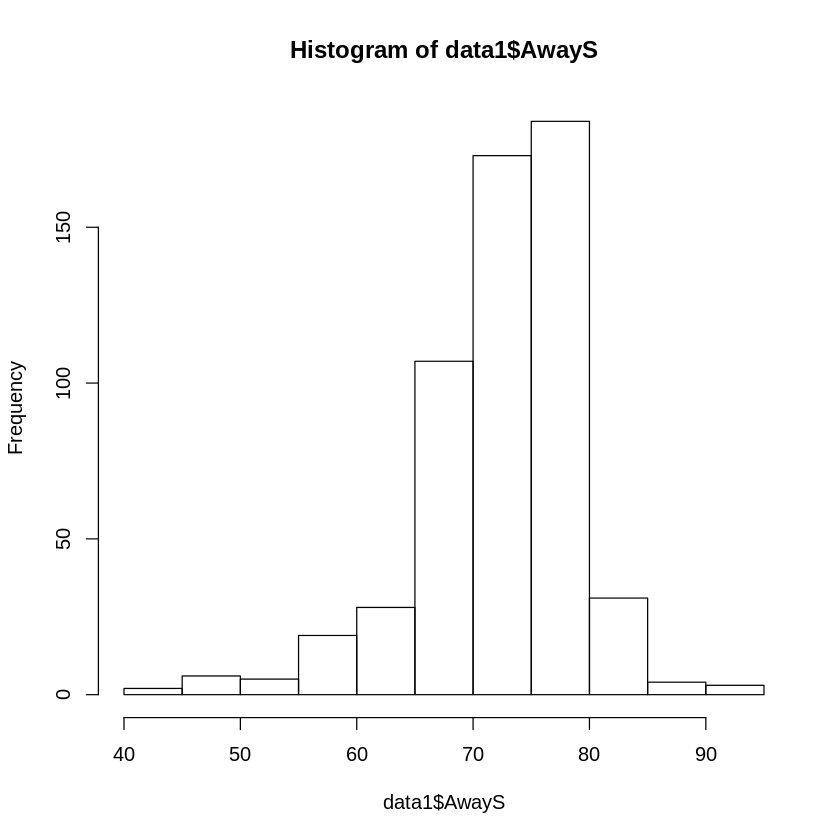

In [56]:
table(data1$AwayS)
hist(data1$AwayS)

In [57]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "17"   
[1] "AwayW" "33"   
[1] "IncWD" "38"   
[1] "IncDish" "141"    
[1] "Age" "3"  
[1] "Income" "2"     
[1] "Educ" "4"   
[1] "Latitude" "18"      


In [58]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 562 101
[1] 534 101


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       4       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 35  36  54 125  76  58  83  63   4 

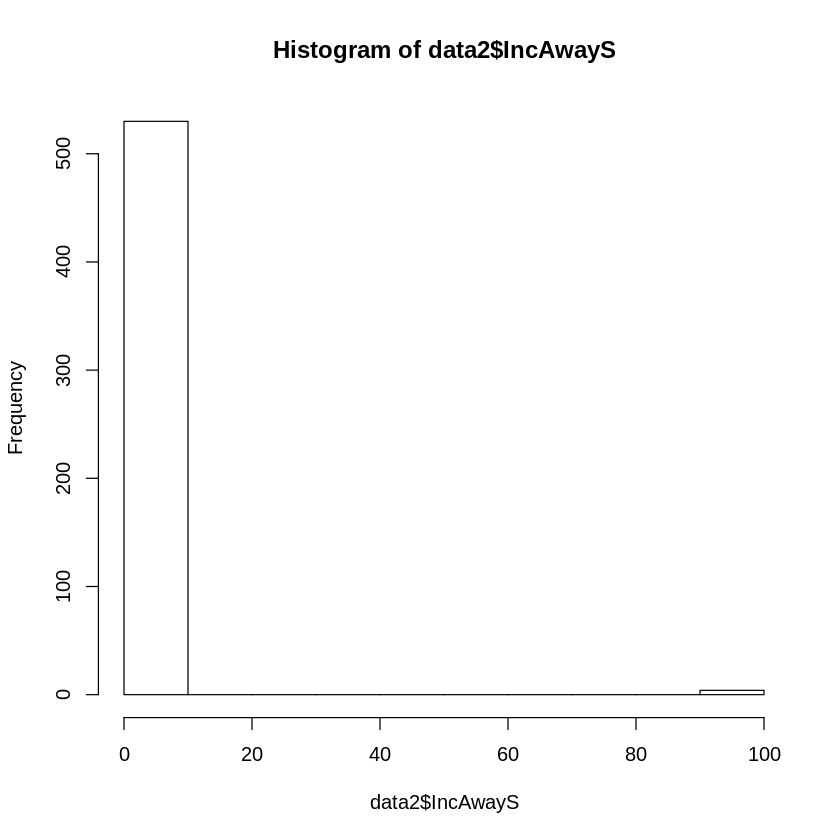

In [59]:
summary(data2$IncAwayS)
table(data2$IncAwayS)
hist(data2$IncAwayS)

In [60]:
sort(names(data2))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "AwayS"      "BillS"      "BillW"      "CashYN"    
 [11] "ComfNS"     "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"    
 [16] "ComfNW1"    "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3" 
 [21] "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"    
 [26] "Educ"       "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"  
 [31] "EnergyC3"   "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"   
 [36] "Frugal3"    "Gender"     "HabitC"     "HabitC1"    "HabitC2"   
 [41] "HabitC3"    "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"   
 [46] "HabitE1"    "HabitE2"    "HabitE3"    "HabitG"     "HomeS"     
 [51] "HouseholdS" "INT1"       "INT2"       "INT3"       "INT4"      
 [56] "IncAutoS"   "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S"
 [61] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
 [66] "Income"     "Latitude"   "MC"         "MC1"        "MC2"       
 [71] "MC3"        "MC4"        "MC5"        "MCBill"     "OwnRent"   
 [76] "PBC1"       "PBC2"       "PBC3R"      "PBC4"       "PBC5"      
 [81] "Political"  "RewardForm" "SN"         "SN1"        "SN2"       
 [86] "SN3"        "SN4"        "Sqft"       "SqftCate"   "State"     
 [91] "SubNorm"    "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg"
 [96] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "Winter_avg"
[101] "X.9to5"

In [61]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Summer_avg",     
"HomeS")

In [62]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "AwayS"      "BillS"      "BillW"      "CashYN"    
 [11] "ComfNS"     "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"    
 [16] "ComfNW1"    "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3" 
 [21] "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"    
 [26] "Educ"       "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"  
 [31] "EnergyC3"   "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"   
 [36] "Frugal3"    "Gender"     "HabitC"     "HabitC1"    "HabitC2"   
 [41] "HabitC3"    "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"   
 [46] "HabitE1"    "HabitE2"    "HabitE3"    "HabitG"     "HomeS"     
 [51] "HouseholdS" "INT1"       "INT2"       "INT3"       "INT4"      
 [56] "IncAutoS"   "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S"
 [61] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
 [66] "Income"     "Latitude"   "MC"         "MC1"        "MC2"       
 [71] "MC3"        "MC4"        "MC5"        "MCBill"     "OwnRent"   
 [76] "PBC1"       "PBC2"       "PBC3R"      "PBC4"       "PBC5"      
 [81] "Political"  "RewardForm" "SN"         "SN1"        "SN2"       
 [86] "SN3"        "SN4"        "Sqft"       "SqftCate"   "State"     
 [91] "SubNorm"    "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg"
 [96] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "Winter_avg"
[101] "X.9to5"

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HomeS"      "HouseholdS" "Income"     "Latitude"   "MC"        
[16] "OwnRent"    "PBC"        "Political"  "SN"         "SqftCate"  
[21] "SubNorm"    "Summer_avg" "Trust"

In [63]:
data1 <- data2[, which(names(data2) %in% c("IncAwayS",IVS))];
sort(names(data1))

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitC"     "HabitG"     "HomeS"     
[11] "HouseholdS" "IncAwayS"   "Income"     "Latitude"   "MC"        
[16] "OwnRent"    "Political"  "SN"         "SqftCate"   "SubNorm"   
[21] "Summer_avg"

In [64]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [65]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [66]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"      "IncAwayS"   "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "Latitude"   "EnergyC"    "MC"         "ComfNS"    
[16] "Atti"       "SubNorm"    "SN"         "HabitG"     "HabitC"    
[21] "Summer_avg"

In [67]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [68]:
hiCor(data2,.7)

,Latitude,Summer_avg
Latitude,1.00,-0.74
Summer_avg,-0.74,1.00


In [69]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.14
    Gender EnergyC    MC  Atti SubNorm    SN HabitG HabitC
PC1  -0.22    -0.4 -0.33 -0.43   -0.36 -0.21   -0.3  -0.28
[1] 0.24
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.24 0.35    0.48      0.5       0.24    0.4
[1] 0.34
    HomeS Latitude ComfNS Summer_avg
PC3 -0.35     0.56  -0.24      -0.55
[1] 0.41
    HomeS  Age Gender HouseholdS Ethnic Educ HabitC
PC4  0.22 0.21  -0.33      -0.51   0.34 0.44   0.27
[1] 0.47
    Political Income Educ EnergyC    MC HabitG HabitC
PC5      0.56    0.2 0.35    0.25 -0.26  -0.44  -0.23
[1] 0.53
      Age Gender Ethnic Income Educ ComfNS   SN HabitC
PC6 -0.46  -0.33  -0.45   0.24 0.21  -0.27 0.29   0.24
[1] 0.58
    IncAwayS   MC ComfNS SubNorm    SN
PC7     0.54 0.22  -0.56   -0.22 -0.38
[1] 0.62
    HomeS IncAwayS Gender Income  Educ   MC ComfNS HabitC
PC8  0.22     -0.3   0.45  -0.25 -0.21 -0.3  -0.38   0.44
[1] 0.66
    HomeS IncAwayS Ethnic   MC SubNorm    SN HabitG
PC9 -0.23    -0.59  -0.35 0.27    -0.3 -0.38   0.26
[1] 0.7

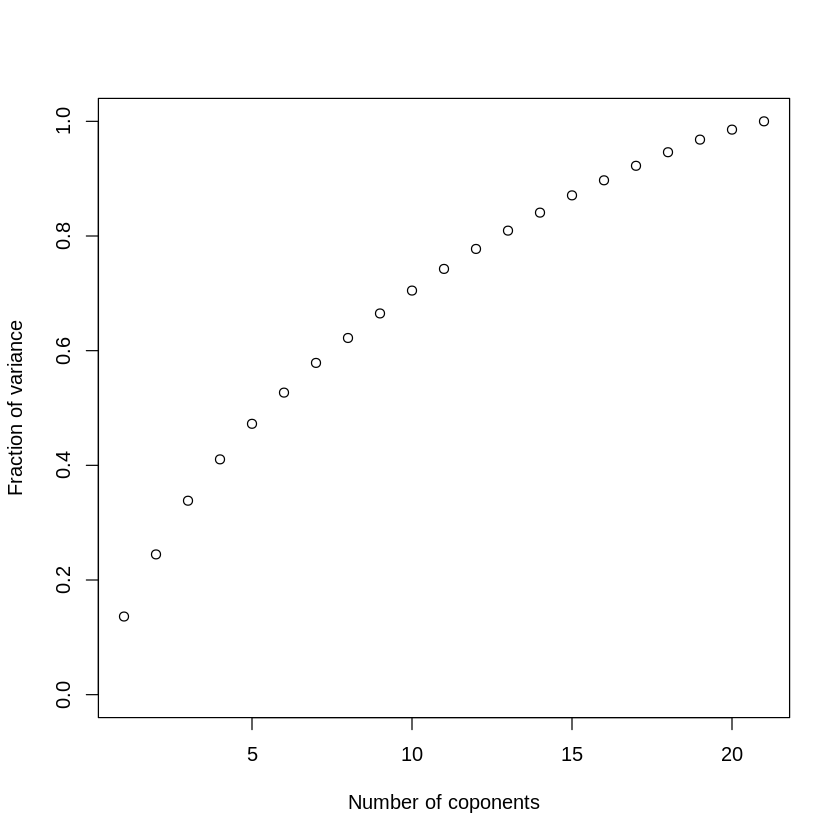

In [70]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [71]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [72]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avg,21,0.48
Latitude,12,0.46
Atti,16,0.45
EnergyC,13,0.42
SqftCate,6,0.35
OwnRent,5,0.31
HouseholdS,7,0.27
Income,10,0.26
SubNorm,17,0.25
MC,14,0.23
HabitG,19,0.23


In [73]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [74]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Summer_avg')

In [75]:
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [76]:
table(data2[,"IncAwayS"])


  1   2   3   4   5   6   7   8  99 
 35  36  54 125  76  58  83  63   4 

In [77]:
data2$Summer_avg = as.factor(data2$Summer_avg)
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.31  -2.48  -0.61   1.32  91.31 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  11.8748     3.7057    3.20   0.0014 **
Age          -0.0167     0.0363   -0.46   0.6462   
Gender        0.1017     0.7807    0.13   0.8964   
OwnRent       1.0088     0.8325    1.21   0.2261   
SqftCate      0.1670     0.4040    0.41   0.6795   
HouseholdS    0.1079     0.3382    0.32   0.7498   
Political    -0.4194     0.4651   -0.90   0.3676   
Ethnic        0.7360     1.0604    0.69   0.4880   
Income        0.0867     0.2163    0.40   0.6888   
Educ         -0.4677     0.3497   -1.34   0.1816   
EnergyC      -0.1227     0.2878   -0.43   0.6700   
MC            0.1609     0.3590    0.45   0.6541   
ComfNS       -0.6975     0.2643   -2.64   0.0086 **
HabitC       -0.4966     0.2671   -1.86   0.0635 . 
Summer_avg2  -0.9585     1.0943   -0.88   0.3815   
Summer_avg3  -1.4483     0.92

In [44]:
mod = lm(fmla,data=data2,subs=data2$Summer_avg!=1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg != 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
 -6.01  -1.72  -0.26   1.44  88.74 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.55e+00   2.16e+00    4.43  1.2e-05 ***
Age          1.70e-02   2.17e-02    0.78  0.43397    
Gender      -3.81e-02   4.59e-01   -0.08  0.93388    
OwnRent      1.05e-01   5.01e-01    0.21  0.83468    
SqftCate     4.46e-01   2.47e-01    1.81  0.07121 .  
HouseholdS  -3.79e-01   2.02e-01   -1.87  0.06180 .  
Political   -2.76e-01   2.86e-01   -0.97  0.33402    
Ethnic      -2.74e-01   5.76e-01   -0.48  0.63419    
Income      -4.52e-06   1.26e-01    0.00  0.99997    
Educ        -1.77e-01   2.12e-01   -0.84  0.40336    
EnergyC     -3.73e-01   1.75e-01   -2.13  0.03350 *  
MC           1.35e-01   2.15e-01    0.63  0.52985    
ComfNS       7.30e-02   1.58e-01    0.46  0.64476    
HabitC      -5.32e-01   1.58e-01   -3.36  0.00085 ***
Summer_avg3 -7

In [37]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-12.37  -3.29  -0.91   1.24  90.19 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   8.1143     5.6115    1.45    0.149  
Age          -0.0237     0.0518   -0.46    0.647  
Gender        1.2469     1.1311    1.10    0.271  
OwnRent       1.7620     1.2681    1.39    0.166  
SqftCate     -0.4459     0.5896   -0.76    0.450  
HouseholdS    0.1455     0.5357    0.27    0.786  
Political    -0.9334     0.6786   -1.38    0.170  
Ethnic        1.5794     1.6072    0.98    0.326  
Income        0.3431     0.3208    1.07    0.285  
Educ         -0.5281     0.5133   -1.03    0.304  
EnergyC       0.0649     0.4191    0.15    0.877  
MC            0.0665     0.5090    0.13    0.896  
ComfNS       -0.9266     0.3819   -2.43    0.016 *
HabitC        0.0864     0.3969    0.22    0.828  
Summer_avg   -0.7407     0.6767   -1.09    0.274  
---
Signif. cod

In [38]:
#17 states with highest average temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-4.731 -1.472 -0.015  1.564  4.472 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.33687    1.13470    2.94   0.0035 ** 
Age          0.00586    0.01145    0.51   0.6089    
Gender       0.08341    0.23559    0.35   0.7235    
OwnRent      0.07440    0.25915    0.29   0.7742    
SqftCate     0.20249    0.12676    1.60   0.1111    
HouseholdS  -0.09541    0.10007   -0.95   0.3411    
Political   -0.01799    0.14734   -0.12   0.9029    
Ethnic      -0.28108    0.27609   -1.02   0.3094    
Income      -0.00703    0.06299   -0.11   0.9112    
Educ         0.09791    0.10637    0.92   0.3580    
EnergyC     -0.10352    0.08572   -1.21   0.2280    
MC          -0.07937    0.11059   -0.72   0.4734    
ComfNS       0.41295    0.08356    4.94  1.2e-06 ***
HabitC      -0.09613    0.08173   -1.18  

In [39]:
#17 middle states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-10.06  -3.44   0.03   1.90  75.14 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.1836     6.8521    3.38  0.00098 ***
Age           0.0370     0.0697    0.53  0.59671    
Gender       -1.0540     1.5561   -0.68  0.49954    
OwnRent       1.0685     1.7403    0.61  0.54044    
SqftCate      0.8019     0.8418    0.95  0.34275    
HouseholdS   -1.3571     0.7523   -1.80  0.07387 .  
Political    -0.6309     0.9761   -0.65  0.51932    
Ethnic        2.3364     2.5810    0.91  0.36724    
Income        0.0602     0.4809    0.13  0.90062    
Educ         -0.3285     0.7941   -0.41  0.67992    
EnergyC      -1.6398     0.6859   -2.39  0.01844 *  
MC            0.6763     0.7191    0.94  0.34895    
ComfNS       -0.8643     0.5187   -1.67  0.09837 .  
HabitC       -1.6722     0.5604   -2.98  

In [40]:
#bottom 17 states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-20.76  -5.53  -1.80   1.97  85.32 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  10.6819    13.3986    0.80   0.4267   
Age          -0.0569     0.1196   -0.48   0.6351   
Gender        1.3350     2.7095    0.49   0.6230   
OwnRent       4.4954     2.9221    1.54   0.1262   
SqftCate     -0.6224     1.3209   -0.47   0.6382   
HouseholdS   -0.1621     1.2977   -0.12   0.9008   
Political    -1.4320     1.5688   -0.91   0.3629   
Ethnic        2.4010     3.9790    0.60   0.5472   
Income        0.7337     0.7781    0.94   0.3473   
Educ         -1.0233     1.2330   -0.83   0.4080   
EnergyC       0.5455     1.0132    0.54   0.5912   
MC           -0.2983     1.2807   -0.23   0.8162   
ComfNS       -2.3564     0.8398   -2.81   0.0057 **
HabitC        0.4024     0.9486    0.42   0.6720   
Sum

In [29]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.8e+00,1.79,0.0084,0.92706
Gender,1,1.3e+02,131.93,0.6205,0.43220
OwnRent,1,9.4e+02,935.91,4.4022,0.03772
SqftCate,1,2.6e+00,2.65,0.0125,0.91127
HouseholdS,1,1.4e+02,138.18,0.6500,0.42151
Political,1,1.5e+02,153.60,0.7225,0.39680
Ethnic,1,1.3e+02,130.38,0.6133,0.43491
Income,1,5.6e+01,56.02,0.2635,0.60856
Educ,1,6.2e+01,62.04,0.2918,0.58994
Latitude,1,3.1e+03,3069.66,14.4386,0.00022


In [30]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
     HomeS   IncAwayS        Age     Gender    OwnRent   SqftCate HouseholdS 
      0.84       0.97       0.99       0.92       1.00       1.00       0.99 
 Political     Ethnic     Income       Educ   Latitude    EnergyC         MC 
      0.94       0.97       0.99       0.98       0.35       0.52       0.78 
    ComfNS       Atti    SubNorm         SN     HabitG     HabitC Summer_avg 
      0.93       0.43       0.75       0.92       0.86       0.89       0.31 

Loadings:
           Factor1 Factor2
EnergyC     0.68          
Atti        0.73          
Latitude           -0.79  
Summer_avg          0.82  
HomeS               0.40  
IncAwayS                  
Age                       
Gender                    
OwnRent                   
SqftCate                  
HouseholdS                
Political                 
Ethnic                    
Income                    
Educ                      
MC          

In [31]:
mod = lm(IncHomeS~ComfNS+EnergyC+Age+Ethnic+MC+Political+Educ,data=data2)
summary(mod)
#plot(mod)

ERROR: Error in eval(expr, envir, enclos): object 'IncHomeS' not found


In [ ]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [ ]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

In [ ]:
library(mgcv)


In [ ]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)


In [ ]:
plot(mGam)

In [ ]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)


In [ ]:
anova(mod1)

In [ ]:
drop1(mod1)

In [ ]:
library(bnlearn)

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [ ]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)

In [ ]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)